In [133]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [1]:
df=pd.read_csv("D:\Datathon.csv")
print(df.shape)

NameError: name 'pd' is not defined

In [135]:
print(df.columns)

Index(['InvoiceId ', 'invoice ', 'Quantity ', 'Gross Amount', 'Total Vat ',
       'Nett Vat ', 'Datetime', 'Discount Category ', 'Zone Id ', 'Zone ',
       'Warehouse Id ', 'Warehouse ', 'Area Id ', 'Area ', 'Type ',
       'Outlet Id ', 'User Id ', 'User ', 'Mode ', 'SKU Id ', 'SKU',
       'Outlet Lat ,', 'Outlet Long ,'],
      dtype='object')


In [166]:
df_1=pd.read_csv("D:\Datathon_1.csv")
df_1.columns

Index(['Date ', 'InvoiceId ', 'invoice ', 'Quantity ', 'Gross Amount ',
       'Total Vat ', 'Nett Vat ', 'Datetime', 'Discount Category ', 'Zone Id ',
       'Zone ', 'Warehouse Id ', 'Warehouse ', 'Area Id ', 'Area ', 'Type ',
       'Outlet Id ', 'User Id ', 'User ', 'Mode ', 'SKU Id ', 'SKU',
       'Outlet Lat ,', 'Outlet Long ,'],
      dtype='object')

In [136]:
df.head(5)

,InvoiceId,invoice,Quantity,Gross Amount,Total Vat,Nett Vat,Datetime,Discount Category,Zone Id,Zone,...,Area,Type,Outlet Id,User Id,User,Mode,SKU Id,SKU,"Outlet Lat ,","Outlet Long ,"
0,2.580000e+20,12451.0,5.0,217.5,11.34,206.16,07-01-2015 08:35,NaN,47,Karnataka,...,East,GT,2,258.0,B1 19,cash,95.0,ID,12.991198,77.713559
1,2.580000e+20,12451.0,3.0,120.0,6.26,113.74,07-01-2015 08:35,NaN,47,Karnataka,...,East,GT,2,258.0,B1 19,cash,96.0,KP,12.991198,77.713559
2,2.580000e+20,12451.0,2.0,84.0,4.38,79.62,07-01-2015 08:35,NaN,47,Karnataka,...,East,GT,2,258.0,B1 19,cash,117.0,Chapati,12.991198,77.713559
3,2.580000e+20,12451.0,3.0,60.0,3.13,56.87,07-01-2015 08:35,NaN,47,Karnataka,...,East,GT,2,258.0,B1 19,cash,128.0,MEALS PAROTA,12.991198,77.713559
4,2.580000e+20,14135.0,10.0,435.0,22.68,412.32,07-02-2015 08:04,NaN,47,Karnataka,...,East,GT,2,258.0,B1 19,cash,95.0,ID,12.991198,77.713559


SKU DETAILS IN df used for gross amount

In [137]:

attribute_name = 'SKU' 
attribute_name = attribute_name.strip()
if attribute_name in df:
    attribute_counts = df[attribute_name].value_counts()
    for attribute, count in attribute_counts.items():
        print(f"{attribute}: {count}")
else:
    print(f"The attribute '{attribute_name}' does not exist in the dataset.")


ID: 45269
KP: 15810
Chapati: 6466
WP: 6339
MEALS PAROTA: 5875
CC-Chutney: 5103
TC-Chutney: 4820
Jr-WP: 2911
Nilgiri ID-1kg: 1222
B2B - KP: 1212
B2B - ID: 105
B2B-W.P: 87
Nilgiri KP: 5
Mini Paraota B2B: 3


SKU DETAILS IN df_1 used for Quantity

In [167]:
attribute_name = 'SKU'
attribute_name = attribute_name.strip()
if attribute_name in df_1:
    attribute_counts = df_1[attribute_name].value_counts()
    for attribute, count in attribute_counts.items():
        print(f"{attribute}: {count}")
else:
    print(f"The attribute '{attribute_name}' does not exist in the dataset.")


ID: 45269
KP: 15810
Chapati: 6466
WP: 6339
MEALS PAROTA: 5875
CC-Chutney: 5103
TC-Chutney: 4820
Jr-WP: 2911
Nilgiri ID-1kg: 1222
B2B - KP: 1212
B2B - ID: 105
B2B-W.P: 87
Nilgiri KP: 5
Mini Paraota B2B: 3


EXPONENTIAL SMOOTHENING FORECASTING METHOD WITH RESPECT TO GROSS AMOUNT

In [138]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define a function for time series forecasting
def forecast_sku(df, sku, train_ratio=0.8):
    sku_data = df[df['SKU'] == sku].sort_index()

    # Skip SKU if there is not enough data
    if len(sku_data) < 10:
        print(f"Not enough data for SKU {sku}. Skipping.")
        return None

    # Convert index to datetime
    sku_data.index = pd.to_datetime(sku_data.index)

    # Split the data into training and test sets
    train_size = int(len(sku_data) * train_ratio)
    train_data, test_data = sku_data[:train_size], sku_data[train_size:]

    # Apply Holt-Winters model
    model = ExponentialSmoothing(
        train_data['Gross Amount'],
        seasonal='add',#optimizer
        seasonal_periods=12,
        initialization_method="estimated",
        use_boxcox=True,
    )
    model_fit = model.fit(optimized=True)
    forecast = model_fit.forecast(steps=len(test_data))

    # Calculate accuracy metrics
    mae = mean_absolute_error(test_data['Gross Amount'], forecast)
    mse = mean_squared_error(test_data['Gross Amount'], forecast)
    rmse = mse ** 0.5

   
    return {
        'SKU': sku,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Forecasted_Gross': forecast
    }

# List of SKUs to forecast
sku_list = ['ID', 'Chapati', 'KP']

# Perform forecasting for each SKU
forecast_results = []
for sku in sku_list:
    result = forecast_sku(df, sku)
    if result:
        forecast_results.append(result)

# Print or visualize the results for each SKU
for result in forecast_results:
    print(f"SKU: {result['SKU']}")
    print(f"MAE: {result['MAE']}")
    print(f"MSE: {result['MSE']}")
    print(f"RMSE: {result['RMSE']}")


c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

SKU: ID
MAE: 245.33395644177511
MSE: 117647.57735084424
RMSE: 342.997926161142
SKU: Chapati
MAE: 76.32989534877834
MSE: 13131.959811622914
RMSE: 114.59476345637664
SKU: KP
MAE: 96.5330961581786
MSE: 19952.775562249368
RMSE: 141.25429396039388


c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


EXPONENTIAL SMOOTHENING WITH RESPECT TO QUANTITY

In [169]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define a function for time series forecasting
def forecast_sku(_1, sku, train_ratio=0.8):
    sku_data = df_1[df_1['SKU'] == sku].sort_index()

    # Skip SKU if there is not enough data
    if len(sku_data) < 10:
        print(f"Not enough data for SKU {sku}. Skipping.")
        return None

    # Convert index to datetime
    sku_data.index = pd.to_datetime(sku_data.index)

    # Split the data into training and test sets
    train_size = int(len(sku_data) * train_ratio)
    train_data, test_data = sku_data[:train_size], sku_data[train_size:]

    # Apply Holt-Winters model
    model = ExponentialSmoothing(
        train_data['Quantity '],
        seasonal='add',
        seasonal_periods=12,
        initialization_method="estimated",
        use_boxcox=True,
    )
    model_fit = model.fit(optimized=True)
    forecast = model_fit.forecast(steps=len(test_data))

    # Calculate accuracy metrics
    mae = mean_absolute_error(test_data['Quantity '], forecast)
    mse = mean_squared_error(test_data['Quantity '], forecast)
    rmse = mse ** 0.5

   
    return {
        'SKU': sku,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Forecasted_Gross': forecast
    }

# List of SKUs to forecast
sku_list = ['ID', 'Chapati', 'KP']

# Perform forecasting for each SKU
forecast_results = []
for sku in sku_list:
    result = forecast_sku(df_1, sku)
    if result:
        forecast_results.append(result)

# Print or visualize the results for each SKU
for result in forecast_results:
    print(f"SKU: {result['SKU']}")
    print(f"MAE: {result['MAE']}")
    print(f"MSE: {result['MSE']}")
    print(f"RMSE: {result['RMSE']}")

c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

SKU: ID
MAE: 5.456447966949427
MSE: 71.34240328567859
RMSE: 8.446443232845326
SKU: Chapati
MAE: 1.882329109783648
MSE: 8.120478815313682
RMSE: 2.849645384133556
SKU: KP
MAE: 2.4309388957683535
MSE: 12.602124714684992
RMSE: 3.54994714251987


c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SEQUENTIAL FORECASTING MODEL WITH LSTM AND DENSE LAYERS WITH QUANTITY AS MAIN CRITERIA

Epoch 1/100
566/566 [==============================] - 6s 9ms/step - loss: 8.6549e-04 - mae: 0.0160 - val_loss: 3.3807e-04 - val_mae: 0.0142
Epoch 2/100
566/566 [==============================] - 5s 9ms/step - loss: 7.8012e-04 - mae: 0.0150 - val_loss: 3.3049e-04 - val_mae: 0.0138
Epoch 3/100
566/566 [==============================] - 6s 10ms/step - loss: 7.7173e-04 - mae: 0.0149 - val_loss: 3.3477e-04 - val_mae: 0.0140
Epoch 4/100
566/566 [==============================] - 7s 12ms/step - loss: 7.6036e-04 - mae: 0.0148 - val_loss: 3.3460e-04 - val_mae: 0.0140
Epoch 5/100
566/566 [==============================] - 6s 10ms/step - loss: 7.5751e-04 - mae: 0.0148 - val_loss: 3.2992e-04 - val_mae: 0.0138
Epoch 6/100
566/566 [==============================] - 6s 10ms/step - loss: 7.5319e-04 - mae: 0.0147 - val_loss: 3.2271e-04 - val_mae: 0.0135
Epoch 7/100
566/566 [==============================] - 7s 12ms/step - loss: 7.5191e-04 - mae: 0.0147 - val_loss: 3.2132e-04 - val_mae: 0.0134
Epoch 8/

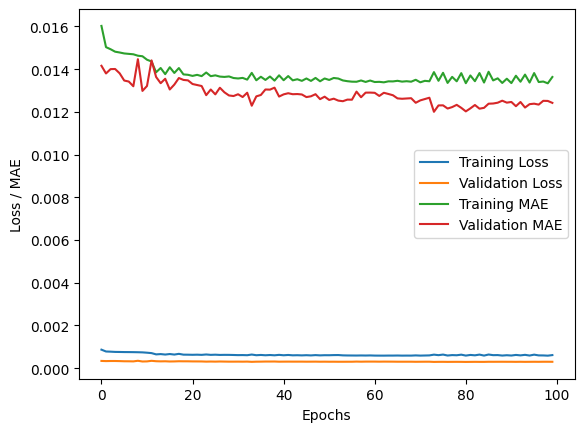

283/283 [==============================] - 1s 2ms/step
MAE: 188.5613140815199
MSE: 68695.18435236558
RMSE: 262.09766185978384
Epoch 1/100
81/81 [==============================] - 2s 11ms/step - loss: 0.0049 - mae: 0.0467 - val_loss: 0.0027 - val_mae: 0.0363
Epoch 2/100
81/81 [==============================] - 1s 9ms/step - loss: 0.0041 - mae: 0.0419 - val_loss: 0.0026 - val_mae: 0.0349
Epoch 3/100
81/81 [==============================] - 1s 10ms/step - loss: 0.0038 - mae: 0.0406 - val_loss: 0.0024 - val_mae: 0.0331
Epoch 4/100
81/81 [==============================] - 1s 10ms/step - loss: 0.0036 - mae: 0.0392 - val_loss: 0.0024 - val_mae: 0.0316
Epoch 5/100
81/81 [==============================] - 1s 10ms/step - loss: 0.0035 - mae: 0.0380 - val_loss: 0.0023 - val_mae: 0.0312
Epoch 6/100
81/81 [==============================] - 1s 10ms/step - loss: 0.0034 - mae: 0.0372 - val_loss: 0.0023 - val_mae: 0.0310
Epoch 7/100
81/81 [==============================] - 1s 10ms/step - loss: 0.0034 - 

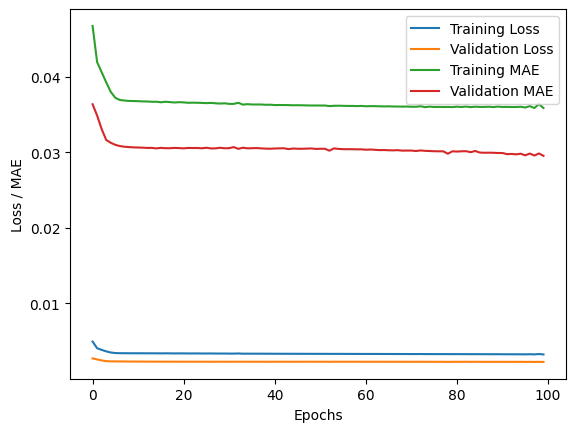

41/41 [==============================] - 0s 2ms/step
MAE: 60.895374536425706
MSE: 9575.785718293988
RMSE: 97.85594370447811
Epoch 1/100
198/198 [==============================] - 3s 10ms/step - loss: 0.0013 - mae: 0.0221 - val_loss: 6.1613e-04 - val_mae: 0.0193
Epoch 2/100
198/198 [==============================] - 2s 10ms/step - loss: 0.0011 - mae: 0.0193 - val_loss: 5.1238e-04 - val_mae: 0.0156
Epoch 3/100
198/198 [==============================] - 2s 10ms/step - loss: 0.0010 - mae: 0.0180 - val_loss: 5.1102e-04 - val_mae: 0.0153
Epoch 4/100
198/198 [==============================] - 2s 9ms/step - loss: 0.0010 - mae: 0.0178 - val_loss: 5.1043e-04 - val_mae: 0.0153
Epoch 5/100
198/198 [==============================] - 2s 10ms/step - loss: 0.0010 - mae: 0.0177 - val_loss: 5.2184e-04 - val_mae: 0.0151
Epoch 6/100
198/198 [==============================] - 2s 10ms/step - loss: 9.9642e-04 - mae: 0.0175 - val_loss: 5.0869e-04 - val_mae: 0.0152
Epoch 7/100
198/198 [========================

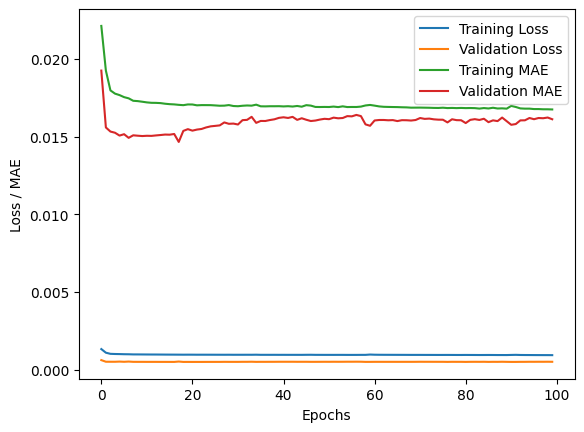

99/99 [==============================] - 0s 2ms/step
MAE: 74.2037061981008
MSE: 10782.005042116325
RMSE: 103.83643407839237


In [185]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame

# List of SKUs to forecast
sku_list = ['ID', 'Chapati', 'KP']  # Add more SKUs as needed

# Loop through each SKU
for sku in sku_list: 
    # Extract the relevant column
    data = df_1[df_1['SKU'] == sku]['Gross Amount '].values
    # Check if the data is not empty
    if len(data) == 0:
        print(f"No data found for SKU: {sku}")
    else:
        # Normalize the data
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_normalized = scaler.fit_transform(data.reshape(-1, 1))

    # Prepare the data
        sequence_length = 10  # You can adjust this based on your needs
        X, y = [], []

        for i in range(len(data_normalized) - sequence_length):
            X.append(data_normalized[i:i+sequence_length])
            y.append(data_normalized[i+sequence_length])

        X, y = np.array(X), np.array(y)

    # Check if there is enough data for training
        if len(X) == 0:
            print(f"Not enough data for training SKU: {sku}")
        else:
        # Split the data into training and testing sets
            split = int(0.8 * len(X))
            X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        # Build the model
            model = tf.keras.Sequential([
            tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
            tf.keras.layers.Dense(units=1)
        ])

            model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

        # Train the model
            history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), shuffle=False)

        # Plot the training history
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.plot(history.history['mae'], label='Training MAE')
            plt.plot(history.history['val_mae'], label='Validation MAE')
            plt.xlabel('Epochs')
            plt.ylabel('Loss / MAE')
            plt.legend()
            plt.show()

        # Evaluate the model on the test set
            y_pred = model.predict(X_test)
            y_pred_original = scaler.inverse_transform(y_pred)
            y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate and print performance metrics
            mae = mean_absolute_error(y_test_original, y_pred_original)
            mse = mean_squared_error(y_test_original, y_pred_original)
            rmse = np.sqrt(mse)

            print(f"MAE: {mae}")
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")


SEQUENTIAL FORECASTING MODEL WITH LSTM AND DENSE LAYERS WITH QUANTITY AS MAIN CRITERIA

Epoch 1/200
566/566 [==============================] - 4s 5ms/step - loss: 0.0010 - mae: 0.0177 - val_loss: 4.1133e-04 - val_mae: 0.0156
Epoch 2/200
566/566 [==============================] - 3s 5ms/step - loss: 9.3315e-04 - mae: 0.0166 - val_loss: 4.0486e-04 - val_mae: 0.0153
Epoch 3/200
566/566 [==============================] - 3s 5ms/step - loss: 9.3135e-04 - mae: 0.0167 - val_loss: 4.0092e-04 - val_mae: 0.0151
Epoch 4/200
566/566 [==============================] - 3s 5ms/step - loss: 9.3040e-04 - mae: 0.0166 - val_loss: 4.0225e-04 - val_mae: 0.0153
Epoch 5/200
566/566 [==============================] - 3s 5ms/step - loss: 9.1463e-04 - mae: 0.0165 - val_loss: 3.9510e-04 - val_mae: 0.0149
Epoch 6/200
566/566 [==============================] - 3s 5ms/step - loss: 8.9890e-04 - mae: 0.0163 - val_loss: 3.9118e-04 - val_mae: 0.0149
Epoch 7/200
566/566 [==============================] - 3s 5ms/step - loss: 8.5492e-04 - mae: 0.0160 - val_loss: 4.0027e-04 - val_mae: 0.0153
Epoch 8/200
566/5

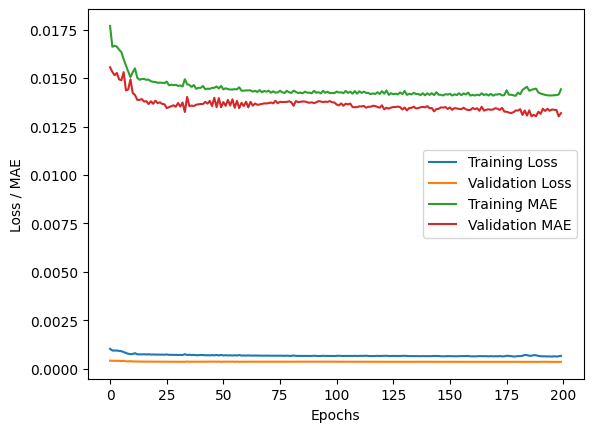

283/283 [==============================] - 1s 2ms/step
MAE: 4.603398294244464
MSE: 42.380706048064205
RMSE: 6.5100465473039595
Epoch 1/200
81/81 [==============================] - 1s 7ms/step - loss: 0.0051 - mae: 0.0479 - val_loss: 0.0028 - val_mae: 0.0363
Epoch 2/200
81/81 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0418 - val_loss: 0.0026 - val_mae: 0.0342
Epoch 3/200
81/81 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0398 - val_loss: 0.0026 - val_mae: 0.0330
Epoch 4/200
81/81 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0385 - val_loss: 0.0025 - val_mae: 0.0322
Epoch 5/200
81/81 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0380 - val_loss: 0.0025 - val_mae: 0.0319
Epoch 6/200
81/81 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0379 - val_loss: 0.0025 - val_mae: 0.0318
Epoch 7/200
81/81 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 

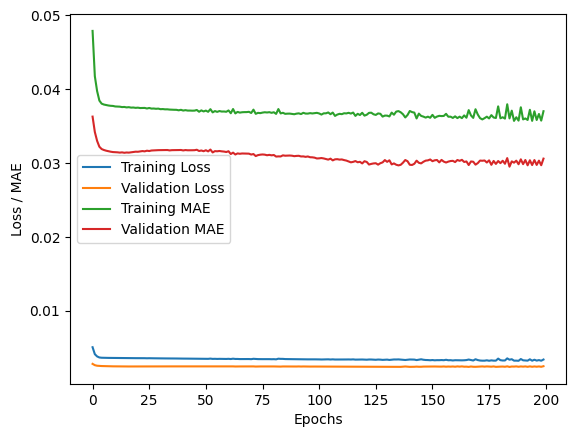

41/41 [==============================] - 0s 2ms/step
MAE: 1.4995199565547908
MSE: 5.977055724022509
RMSE: 2.4448017760183562
Epoch 1/200
198/198 [==============================] - 2s 6ms/step - loss: 0.0014 - mae: 0.0226 - val_loss: 6.0606e-04 - val_mae: 0.0192
Epoch 2/200
198/198 [==============================] - 1s 6ms/step - loss: 0.0011 - mae: 0.0190 - val_loss: 5.1210e-04 - val_mae: 0.0153
Epoch 3/200
198/198 [==============================] - 1s 6ms/step - loss: 0.0010 - mae: 0.0179 - val_loss: 5.1229e-04 - val_mae: 0.0151
Epoch 4/200
198/198 [==============================] - 1s 6ms/step - loss: 0.0010 - mae: 0.0177 - val_loss: 5.1430e-04 - val_mae: 0.0150
Epoch 5/200
198/198 [==============================] - 1s 6ms/step - loss: 0.0010 - mae: 0.0176 - val_loss: 5.1045e-04 - val_mae: 0.0150
Epoch 6/200
198/198 [==============================] - 1s 6ms/step - loss: 0.0010 - mae: 0.0175 - val_loss: 5.1063e-04 - val_mae: 0.0150
Epoch 7/200
198/198 [==============================] 

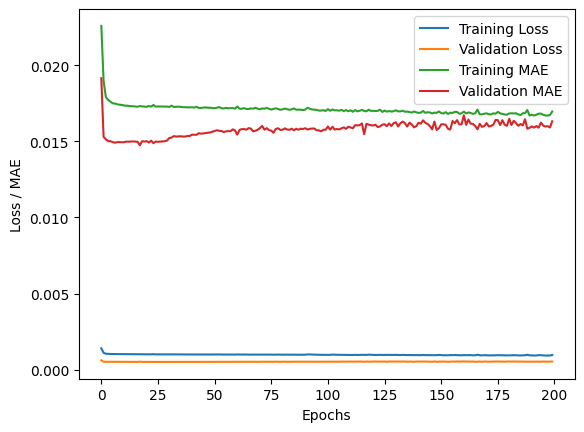

99/99 [==============================] - 0s 2ms/step
MAE: 1.87691267487369
MSE: 6.98379409882482
RMSE: 2.6426869089668608


In [174]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame

# List of SKUs to forecast
sku_list = ['ID', 'Chapati', 'KP']  # Add more SKUs as needed

# Loop through each SKU
for sku in sku_list: 
    # Extract the relevant column
    data = df_1[df_1['SKU'] == sku]['Quantity '].values

    # Check if the data is not empty
    if len(data) == 0:
        print(f"No data found for SKU: {sku}")
    else:
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_normalized = scaler.fit_transform(data.reshape(-1, 1))

    # Prepare the data
    sequence_length = 10  # You can adjust this based on your needs
    X, y = [], []

    for i in range(len(data_normalized) - sequence_length):
        X.append(data_normalized[i:i+sequence_length])
        y.append(data_normalized[i+sequence_length])

    X, y = np.array(X), np.array(y)

    # Check if there is enough data for training
    if len(X) == 0:
        print(f"Not enough data for training SKU: {sku}")
    else:
        # Split the data into training and testing sets
        split = int(0.8 * len(X))
        X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        # Build the model
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
            tf.keras.layers.Dense(units=1)
        ])

        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), shuffle=False)

        # Plot the training history
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('Loss / MAE')
        plt.legend()
        plt.show()

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        y_pred_original = scaler.inverse_transform(y_pred)
        y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate and print performance metrics
        mae = mean_absolute_error(y_test_original, y_pred_original)
        mse = mean_squared_error(y_test_original, y_pred_original)
        rmse = np.sqrt(mse)

        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")


DECISION TREE 
USED DATETIME AND QUANTITY WITH RESPECT TO SKU

SEQUENTIAL FORECASTING MODEL WITH LSTM AND DENSE LAYERS WITH QUANTITY AS MAIN CRITERIA

Metrics for SKU: ID
MAE: 8.72961776403005
MSE: 245.97080755634113
RMSE: 15.683456492633923


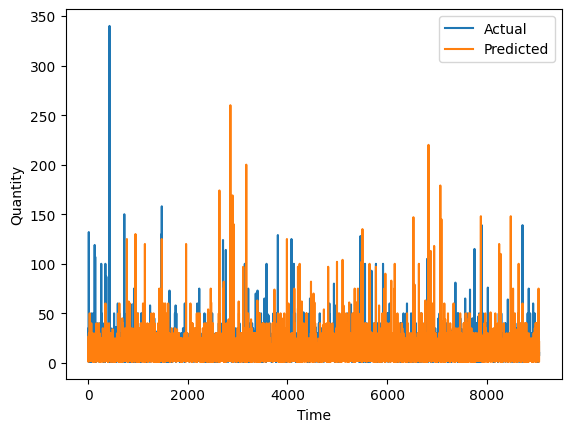

Metrics for SKU: Chapati
MAE: 2.958978328173375
MSE: 19.407894736842106
RMSE: 4.405439221785055


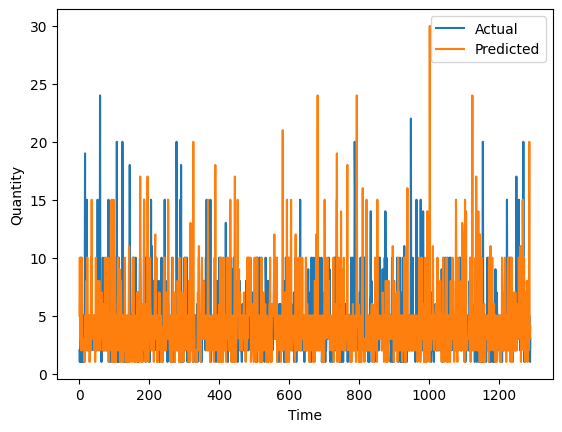

Metrics for SKU: KP
MAE: 3.8439873417721517
MSE: 38.551582278481014
RMSE: 6.208992050122227


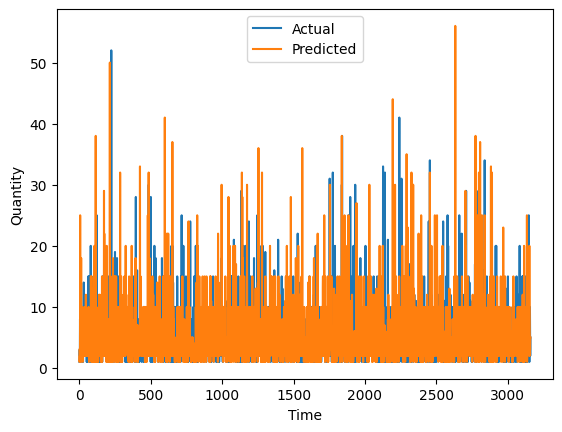

In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame
df_1 = pd.read_csv("D:\Datathon_1.csv")

# Convert 'Datetime' column to datetime format
df_1['Datetime'] = pd.to_datetime(df_1['Datetime'], format='%d-%m-%Y %H:%M')

# List of SKUs to forecast
sku_list = ['ID', 'Chapati', 'KP']  # Add more SKUs as needed

# Loop through each SKU
for sku in sku_list:
    # Extract the relevant column
    data = df_1[df_1['SKU'] == sku][['Datetime', 'Quantity ']]
    # Check if the data is not empty
    if len(data) == 0:
        print(f"No data found for SKU: {sku}")
    else:
        # Prepare the data
        sequence_length = 10  # You can adjust this based on your needs
        X, y = [], []

        for i in range(len(data) - sequence_length):
            X.append(data['Datetime'].iloc[i:i+sequence_length].values)
            y.append(data['Quantity '].iloc[i+sequence_length])

        X, y = np.array(X), np.array(y)

        # Check if there is enough data for training
        if len(X) == 0:
            print(f"Not enough data for training SKU: {sku}")
        else:
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Build the model
            model = DecisionTreeRegressor()

            # Train the model
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Calculate and print performance metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            print(f"Metrics for SKU: {sku}")
            print(f"MAE: {mae}")
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")

            # Visualize the results
            plt.plot(y_test, label='Actual')
            plt.plot(y_pred, label='Predicted')
            plt.xlabel('Time')
            plt.ylabel('Quantity')
            plt.legend()
            plt.show()


DECISION TREE 
USED DATETIME AND GROSS AMOUNT WITH RESPECT TO SKU

Metrics for SKU: ID
MAE: 381.12861356606277
MSE: 429643.30464621074
RMSE: 655.4718183463044


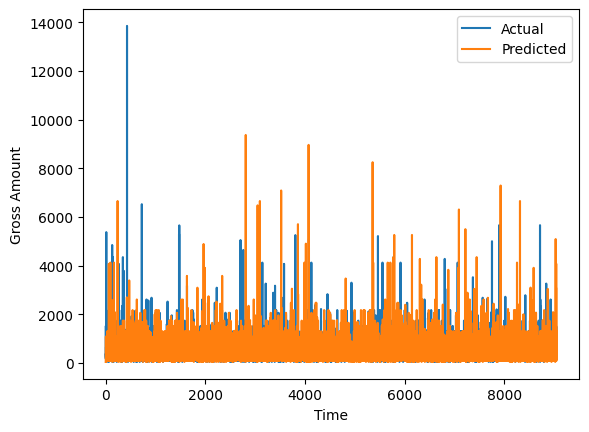

Metrics for SKU: Chapati
MAE: 124.71594427244582
MSE: 34066.71493003096
RMSE: 184.5717067430189


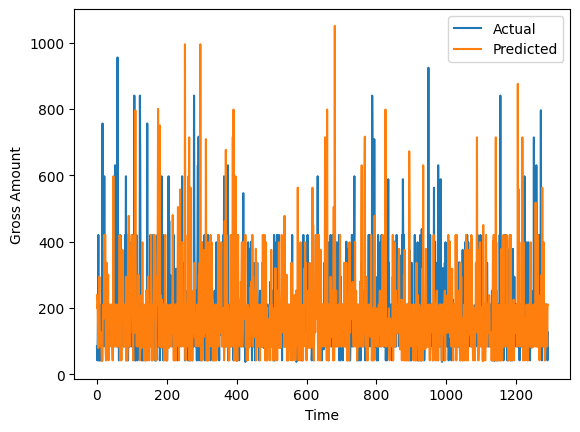

Metrics for SKU: KP
MAE: 149.74132911392405
MSE: 60218.10711234177
RMSE: 245.3937796936625


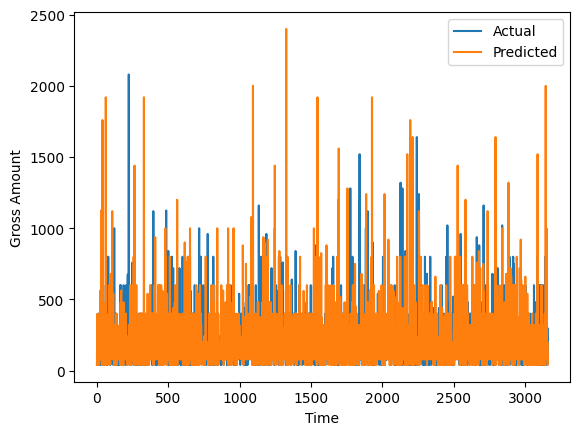

In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame
df = pd.read_csv("D:\Datathon_1.csv")

# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')

# List of SKUs to forecast
sku_list = ['ID', 'Chapati', 'KP']  # Add more SKUs as needed

# Loop through each SKU
for sku in sku_list:
    # Extract the relevant column
    data = df[df['SKU'] == sku][['Datetime', 'Gross Amount ']]
    # Check if the data is not empty
    if len(data) == 0:
        print(f"No data found for SKU: {sku}")
    else:
        # Prepare the data
        sequence_length = 10  # You can adjust this based on your needs
        X, y = [], []

        for i in range(len(data) - sequence_length):
            X.append(data['Datetime'].iloc[i:i+sequence_length].values)
            y.append(data['Gross Amount '].iloc[i+sequence_length])

        X, y = np.array(X), np.array(y)

        # Check if there is enough data for training
        if len(X) == 0:
            print(f"Not enough data for training SKU: {sku}")
        else:
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Build the model
            model = DecisionTreeRegressor()

            # Train the model
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Calculate and print performance metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            print(f"Metrics for SKU: {sku}")
            print(f"MAE: {mae}")
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")

            # Visualize the results
            plt.plot(y_test, label='Actual')
            plt.plot(y_pred, label='Predicted')
            plt.xlabel('Time')
            plt.ylabel('Gross Amount')
            plt.legend()
            plt.show()
